In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/422_Project/Suicide_Detection.csv')

In [ ]:
dataset.shape

(232074, 3)

In [ ]:
dataset.head(10)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
text,0
class,0


In [ ]:
dataset = dataset.iloc[:200, :]
dataset.shape
# dataset.head(5)

(200, 3)

In [ ]:
# import all
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# wordnet is just another nltk corpus reader
# textblob is a python library for processing textual data,
    #do tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
# CountVectorizer --> Convert a collection of text documents to a matrix of token counts

In [ ]:
# download []
nltk.download('punkt')     # punkt tokenizer model
nltk.download('wordnet')
nltk.download('stopwords')

# stopwords [frequently used words in english that doesnt make sense in a a sentence]
sw = stopwords.words('english')
sw = sw + ['im', 'ive', 'dont']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Data Preprocessing**

### **Feature Scaling (Normalization)**

In [ ]:
# FEATURE SCALING TECHNIQUES

  # --NORMALIZING -->

   # [Stemming and Lemmatization  is a method of normalization of words in NLTK, used to categorize the same type of data by getting its root word.]
   # Stemming --> root form e ney, but spelling bhul thakte pare
   # Lemmatization --> correct root form

  # --STANDARDIZING-->[]

In [ ]:
# Normalizing
    # 1. remove symbols, links, punctuation and all text k lowercase krbo
    # 2. grammar correction
    # 3. tokenize each word as vocabulary
    # 4. remove stop word
    # 5. finally process sentence

def clean_the_data(text):
    global count

    # removed symbols, punctution, links and lowercased the text
    pattern = "[^\w^\s]|^http.*"
    clean_text = re.sub(pattern, "", text).lower()

    # corrected grammartical errors
    tb = TextBlob(clean_text)
    correct_text = tb.correct().string

    # Before, stemming, tokenization is done so as to break text into chunks
    # applied word tokenization ex. ["CSE422", "is", "giving", "me", "depression"]
    tokenized = nltk.word_tokenize(correct_text)

    # removed stop words(i, am, is, are, of, for...)
    removed_stop_words = []
    for i in tokenized:
        if i not in sw:
            removed_stop_words.append(i)

    # wordnetlemmatizer and stemmer converts each words to it's root form
    # ["wait", "waiting", "waited", "waits"]---> "wait"
    processed_sentence = ""
    wnl = WordNetLemmatizer()
    ps = PorterStemmer()
    for j in removed_stop_words:
        lemmatized_word = wnl.lemmatize(j)
        processed_sentence += ps.stem(lemmatized_word) + " "
    count += 1
    print(count)
    return processed_sentence[:-1]

# Normalizing done


In [ ]:
# function call
count = 0
dataset["text"] = dataset["text"].apply(clean_the_data)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
dataset.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
# label encoding
y = dataset["class"]
encoder = LabelEncoder()
y = encoder.fit_transform(y)
dataset["class"] = y
dataset.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,1
1,3,Am I weird I don't get affected by compliments...,0
2,4,Finally 2020 is almost over... So I can never ...,0
3,8,i need helpjust help me im crying so hard,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",1


In [ ]:
# Train, Test, Split

x = dataset.drop(["class"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 2)
(60, 2)
(140,)
(60,)


## **Feature Scaling (Standardization)**

In [ ]:
# bag of words
# CountVectorizer --> Convert a collection of text documents to a matrix of token counts

cv = CountVectorizer()
x_train_bow = cv.fit_transform(x_train['text']).toarray()
x_test_bow = cv.transform(x_test['text']).toarray()

print(x_train_bow.shape)
print(x_test_bow.shape)

# print("\nTrain Array")
# print(x_train_bow)
# print("\nTest Array")
# print(x_test_bow)

(140, 3299)
(60, 3299)


### **Random Forest**

In [ ]:
# Model Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_bow,y_train)
y_pred = model.predict(x_test_bow)
score_random_forest = accuracy_score(y_test,y_pred)
print(f"Accuracy score of Random Forest model is  {score_random_forest*100}%")

# y_test= 'actual' (test er result koto howa uchit)
# y_pred = model er prediction on the test

Accuracy score of Random Forest model is  81.66666666666667%


In [ ]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm_rf)

Confusion Matrix:
[[27  4]
 [ 7 22]]


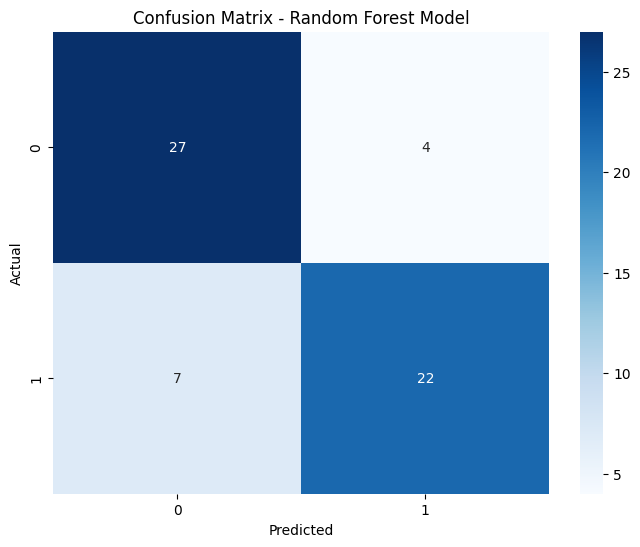

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **KNN**

In [ ]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_bow, y_train)
y_pred = knn.predict(x_test_bow)

score_knn = accuracy_score(y_pred, y_test)
print(f"Accuracy score of KNN is {score_knn*100}%")

Accuracy score of KNN is 78.33333333333333%


In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix for KNN Model:")
print(cm_knn)


Confusion Matrix for KNN Model:
[[30  1]
 [12 17]]


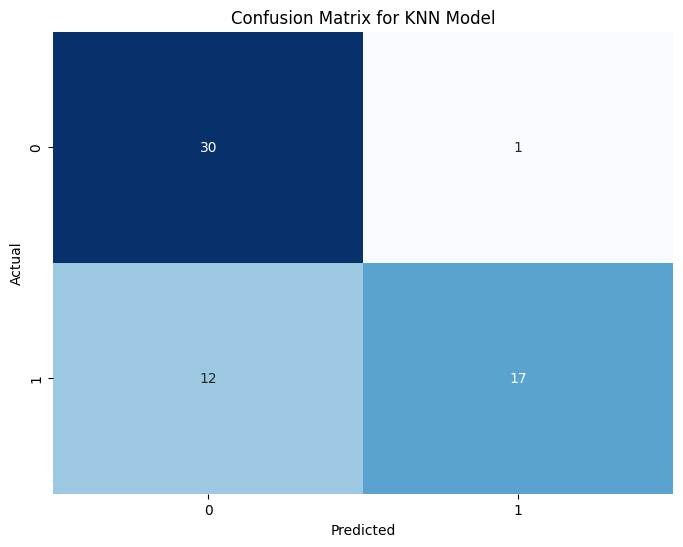

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


## **Decision Tree**

In [ ]:
# Model Dicision Tree

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train_bow, y_train)
y_pred = model.predict(x_test_bow)

score_decision_tree = accuracy_score(y_test,y_pred)
print(f"Accuracy score of Decision Tree model is  {score_decision_tree*100}%")

Accuracy score of Decision Tree model is  76.66666666666667%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix for Decision Tree Model:")
print(cm_dt)

Confusion Matrix for Decision Tree Model:
[[23  8]
 [ 6 23]]


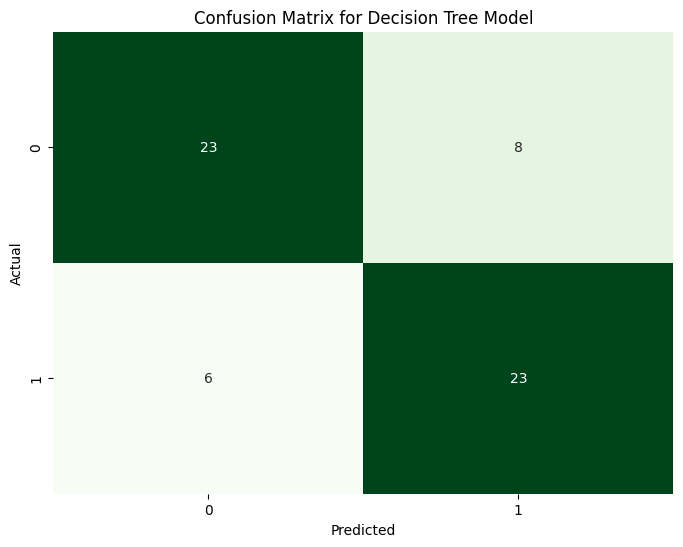

In [ ]:
# Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", cbar=False)

plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## **Logistic Regression**

In [ ]:
# Model Logistic Regression

model = LogisticRegression(solver='lbfgs')
model.fit(x_train_bow, y_train)
y_pred = model.predict(x_test_bow)

score_logistic_regression = accuracy_score(y_pred, y_test)
print(f"Accuracy score of logistic regression is {score_logistic_regression*100}%")

Accuracy score of logistic regression is 81.66666666666667%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix for Logistic Regression Model:")
print(cm_lr)

Confusion Matrix for Logistic Regression Model:
[[26  5]
 [ 6 23]]


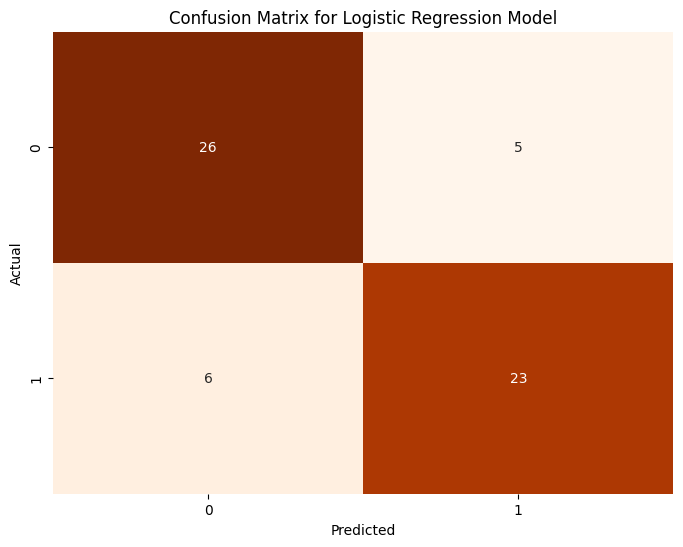

In [ ]:
# Seaborn (confusion matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", cbar=False)

plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## **Naive Bayes**

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train_bow,y_train)
y_pred = NB_classifier.predict((x_test_bow))

score_multinomial_nb = accuracy_score(y_pred,y_test)
print(f"Accuracy score of MultinomialNB model is  {score_multinomial_nb*100}%")

Accuracy score of MultinomialNB model is  65.0%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix for Naive Bayes (MultinomialNB) Model:")
print(cm_nb)

Confusion Matrix for Naive Bayes (MultinomialNB) Model:
[[10 21]
 [ 0 29]]


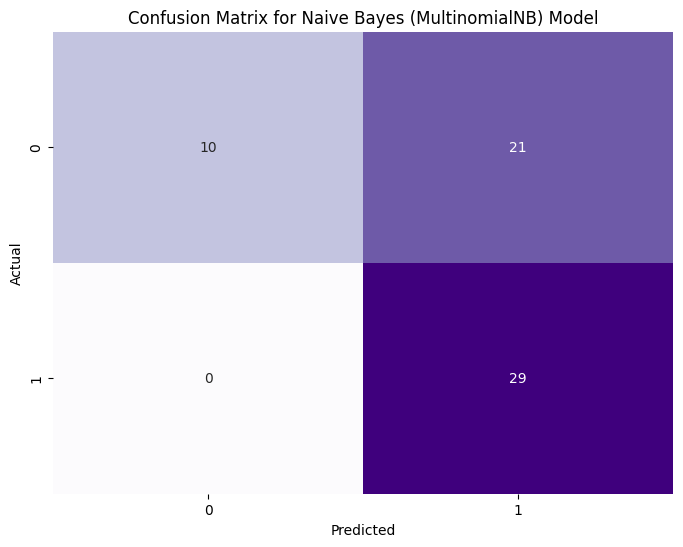

In [ ]:
# Seaborn (confusion matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Purples", cbar=False)

plt.title("Confusion Matrix for Naive Bayes (MultinomialNB) Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## **BarChart of Accuracy**

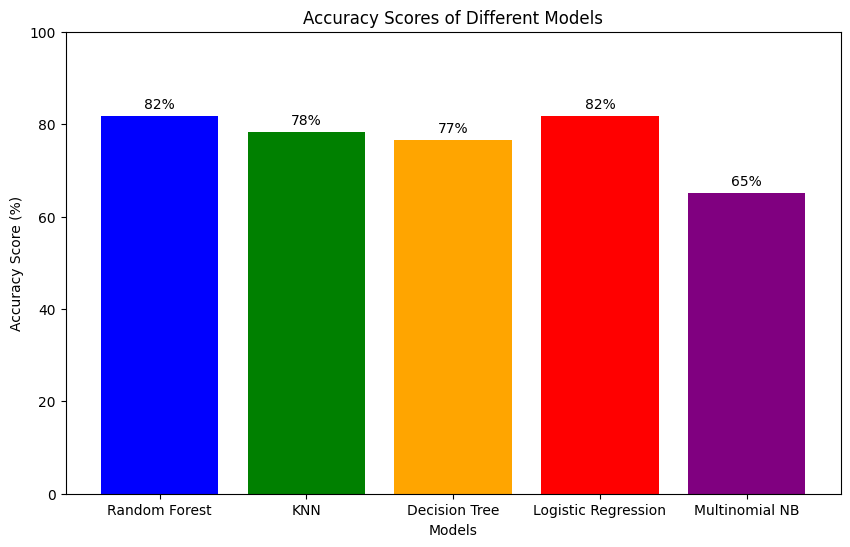

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated accuracy scores for each model
accuracy_scores = [score_random_forest, score_knn, score_decision_tree, score_logistic_regression, score_multinomial_nb]
models = ['Random Forest','KNN', 'Decision Tree', 'Logistic Regression', 'Multinomial NB']

# Convert accuracy scores to percentage by multiplying by 100
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_percentages, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.ylim(0, 100)  # Set y-axis limit to percentage values

# Displaying the accuracy scores on top of the bars
for i, percentage in enumerate(accuracy_percentages):
    plt.text(i, percentage + 1, f'{percentage:.0f}%', ha='center', va='bottom')

# Show the plot
plt.show()


### **Imbalance of class (0=Non-suicide, 1=Suicide)**

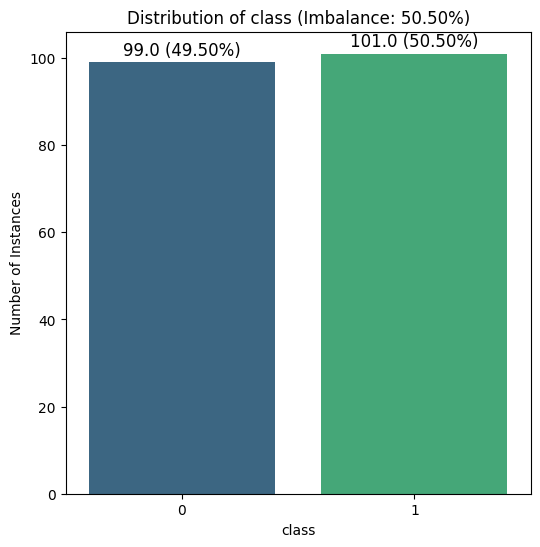

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the column you want to explore (replace 'class' with your actual column name)
selected_column = 'class'

# Check the distribution of the selected column
column_distribution = dataset[selected_column].value_counts()

# Calculate the imbalance percentage
imbalance_percentage = (column_distribution[1] / column_distribution.sum()) * 100

# Bar chart representation of column distribution with imbalance percentage
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=selected_column, data=dataset, palette='viridis')

# Add annotations to label the bars with counts and imbalance percentage
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(dataset) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title(f'Distribution of {selected_column} (Imbalance: {imbalance_percentage:.2f}%)')
plt.xlabel(selected_column)
plt.ylabel('Number of Instances')
plt.show()

# 0 means non-suicide
# 1 means suicide

## **Correlation Matrix**

<ipython-input-35-30cd65416372>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


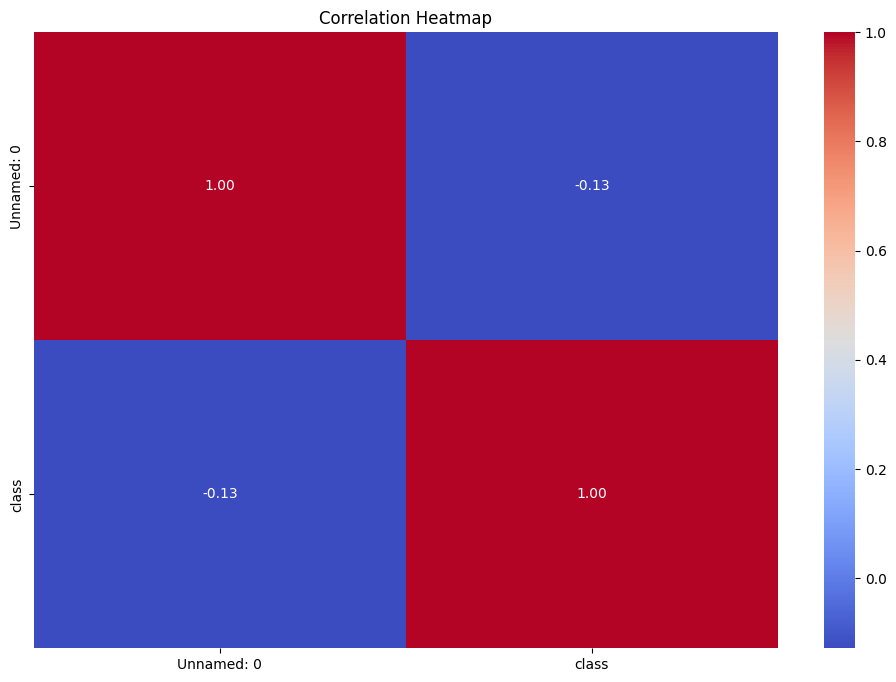

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataset.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# dataset.corr()

In [ ]:
# dataset.describe()